<a href="https://colab.research.google.com/github/harinivas03/Python-Induction-Programme/blob/main/MLassig(21AIA31).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
df=pd.read_csv("/content/card_transdata.csv")

In [ ]:
df.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [ ]:
df.shape

(1000000, 8)

In [ ]:
df.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         distance_from_home  distance_from_last_transaction  \
0                    False                           False   
1                    False                           False   
2                    False                           False   
3                    False                           False   
4                    False                           False   
...                    ...                             ...   
999995               False                           False   
999996               False                           False   
999997               False                           False   
999998               False                           False   
999999               False                           False   

        ratio_to_median_purchase_price  repeat_retailer  used_chip  \
0                                False            False      False   
1                                False            Fal

In [ ]:
df.notnull()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...
999995,True,True,True,True,True,True,True,True
999996,True,True,True,True,True,True,True,True
999997,True,True,True,True,True,True,True,True
999998,True,True,True,True,True,True,True,True


In [ ]:
df.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

In [ ]:
X=df.drop('fraud',axis=1)
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0


In [ ]:
Y=df['fraud']
Y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
999995    0.0
999996    0.0
999997    0.0
999998    0.0
999999    0.0
Name: fraud, Length: 1000000, dtype: float64

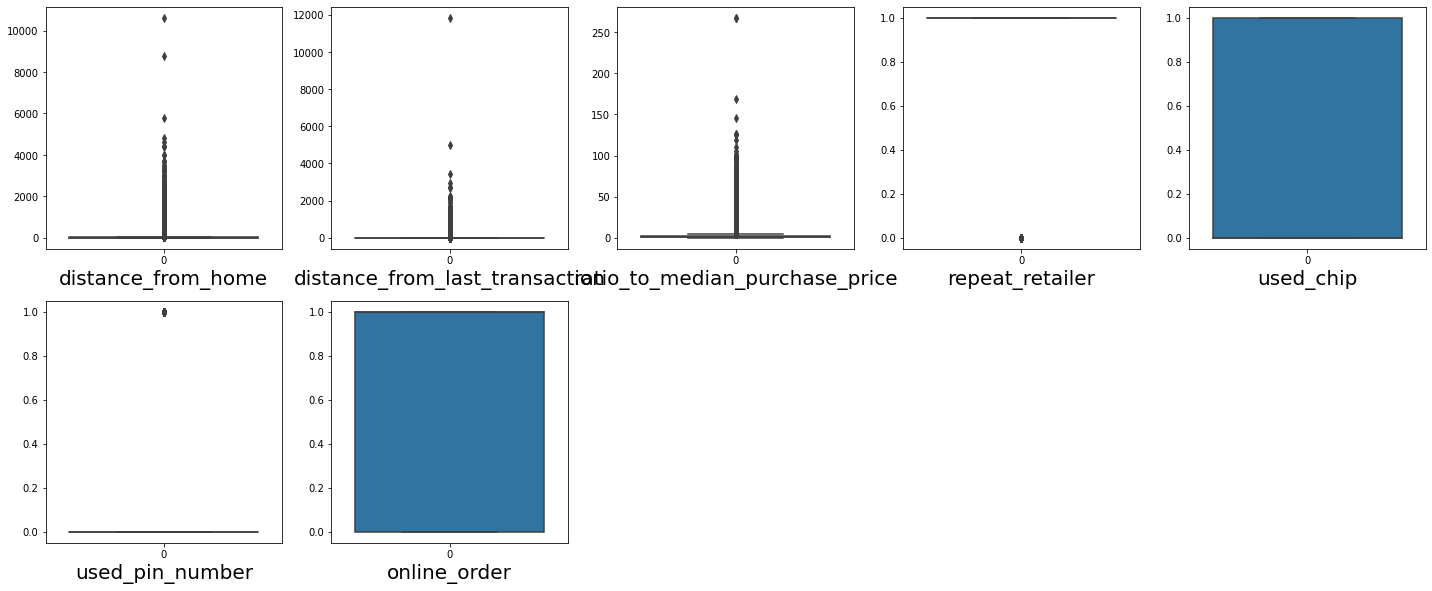

In [ ]:
plt.figure(figsize=(20,20))
plotnumber=1
for col in X.columns:
  if plotnumber<=8:
    ax=plt.subplot(5,5,plotnumber)
    sns.boxplot(X[col])
    plt.xlabel(col,fontsize=20)
  plotnumber+=1
plt.tight_layout()
plt.show()

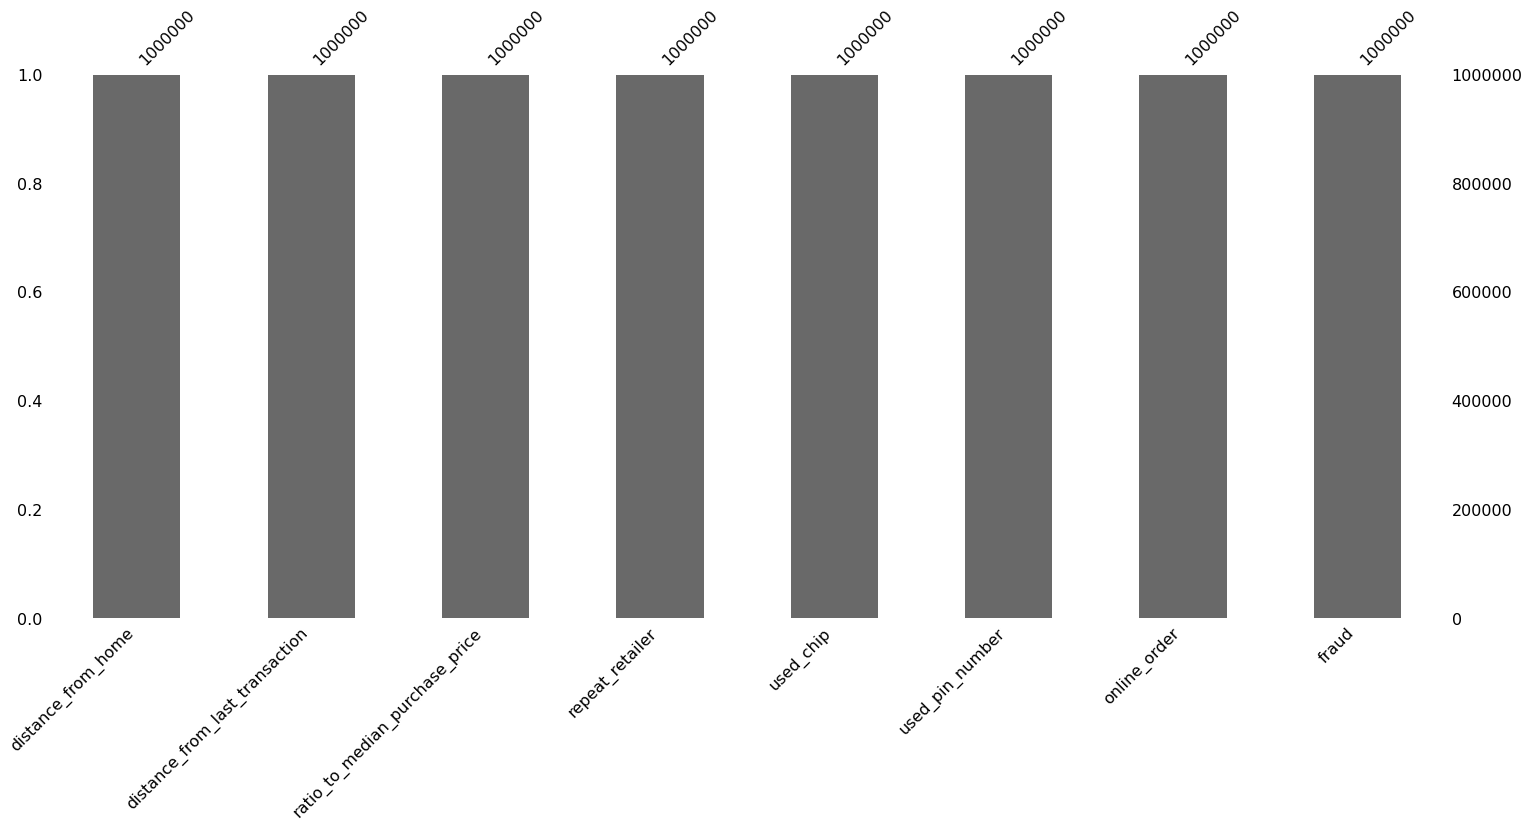

In [ ]:
import missingno as mn
mn.bar(df)
plt.show()

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.5,random_state=0)

In [ ]:
a=StandardScaler()
X_train=a.fit_transform(X_train)
X_test=a.transform(X_test)

In [ ]:
clf=DecisionTreeClassifier(criterion="gini",random_state=0)
clf.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
Y_pred=clf.predict(X_test)

In [ ]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[456239,      8],
       [    15,  43738]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y_test,Y_pred)

0.999954

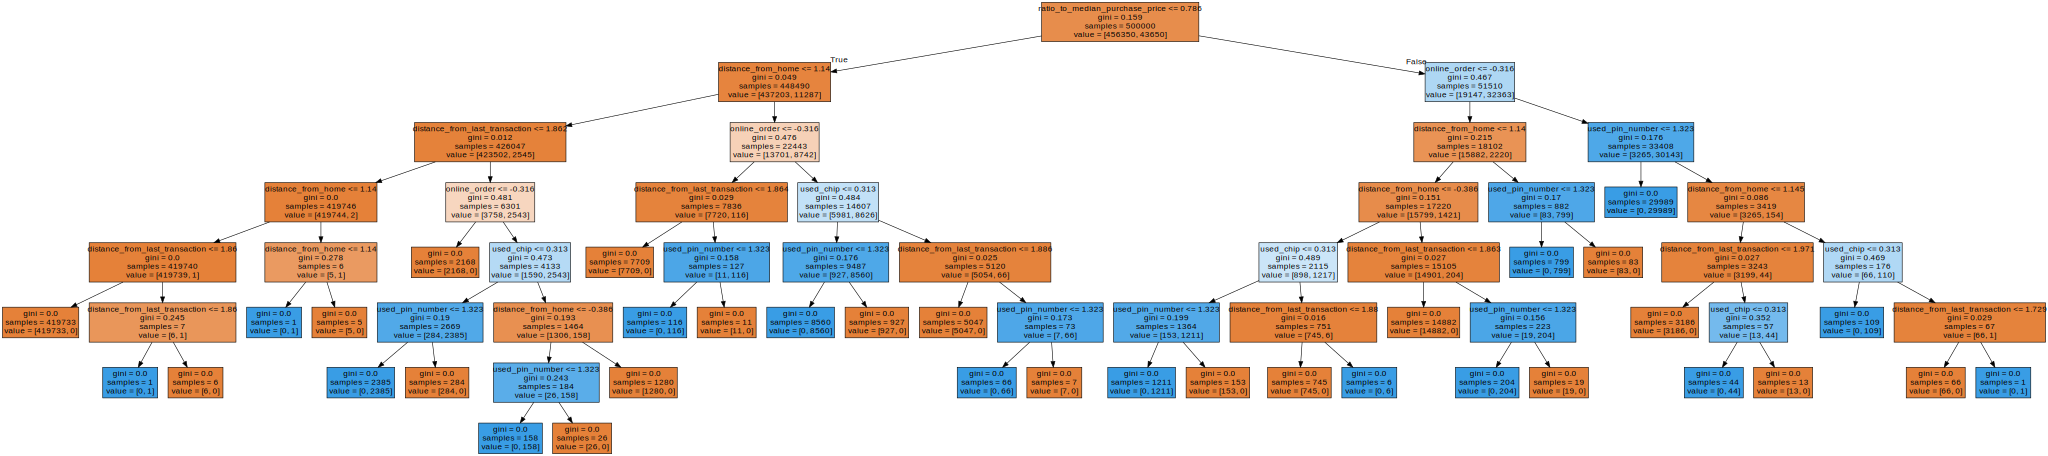

In [ ]:
from sklearn.tree import export_graphviz
graphviz.Source(export_graphviz(clf,feature_names=X.columns,filled=True))

In [ ]:
from sklearn.linear_model import LinearRegression
import datetime
from statistics import mean
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
pred=model.predict(X_test)

In [ ]:
Variance=np.var(pred)
Variance

0.026381080768430352

In [ ]:
Sum_of_squared_error=np.mean((np.mean(pred)))
Bias=Sum_of_squared_error-Variance
Bias

0.06103280290446718

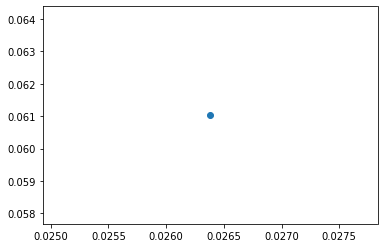

In [ ]:
plt.scatter(Variance,Bias)
plt.show()